<a href="https://colab.research.google.com/github/aryannewyork/Machine-Learning-Algorithms/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [7]:
a = 2
b = 2
c = 3/4
d = 4
e = 2
f = 3
m = 1/3

In [8]:
def fun1():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, 15) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([m*x[i] + b for i in range(len(x))])
  return df

def fun2():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.cos(b*x[i]) + c*np.sin(d*x[i]) + e  for i in range(len(x))])
  return df

def fun3():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.exp(b*x[i])*np.cos(c*x[i]) + d*np.exp(e*x[i])*np.sin(f*x[i])  for i in range(len(x))])
  return df
  
def fun4():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.sin(b*x[i]) + c*np.cos(d*x[i]) + e  for i in range(len(x))])
  return df

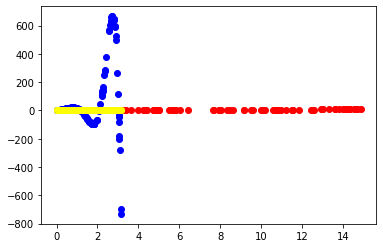

In [9]:
df1 = fun1()
plt.scatter(df1['x'], df1['y'], color='red')
df2 = fun2()
plt.scatter(df2['x'], df2['y'], color='green')
df3 = fun3()
plt.scatter(df3['x'], df3['y'], color='blue')
df4 = fun4()
plt.scatter(df4['x'], df4['y'], color='yellow')

plt.show()

In [10]:
'''Normalizing the data so all the features can be in the same scale
During gradient descent any specific feature shouldn't overpower and thus normalization becomes imperative
This preserves the inherent characteristics of the feature and also equalizes the scales of all the features.'''

def normalize(df):
  for col in df:
    max = df[str(col)].max()
    min = df[str(col)].min()
    df[str(col)] = (df[str(col)] - min)/(max-min)
  return df

In [30]:
'''The code is written to perform polynomial regression on 'synthetically' generated data
, so to generate the data pass in the 'fun' parameter and the function also takes in the some hyperparameters, such as
the degree of the polynomial that the algorithm will try to fit, learning rate, number of epochs, and regularization parameter.
'''
def polynomial_regression(fun, k, regularization_parameter=0.01, epochs=1000, learning_rate=0.1):
  df = normalize(fun())
  X_train, X_test, Y_train, Y_test = train_test_split(df['x'], df['y'], test_size=0.25, random_state = 0)
  weights = np.array([0 for i in range(k+1)], dtype='float32')
  X_train_updated = [(X_train**i) for i in range(len(weights))]
  for epoch in range(epochs):
    Y_pred = np.dot(weights, X_train_updated)
    for i in range(len(weights)):
      weights[i] -= learning_rate*((-2/len(X_train))*np.sum((Y_train - Y_pred)*(X_train**i)) + regularization_parameter*np.sum(weights))
  
  Y_Pred = np.dot(weights, [(X_test**i) for i in range(len(weights))])
  plt.scatter(X_test, Y_Pred, color='r', label='Predictions')
  plt.scatter(X_test, Y_test, color='g', label='Real')
  plt.legend()
  plt.show()
  return weights


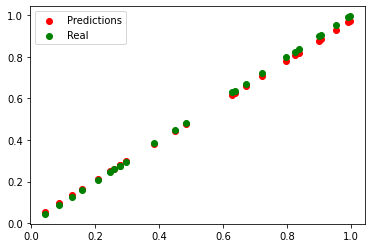

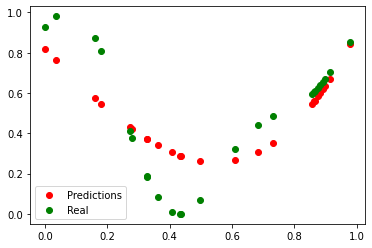

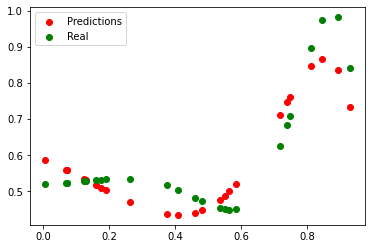

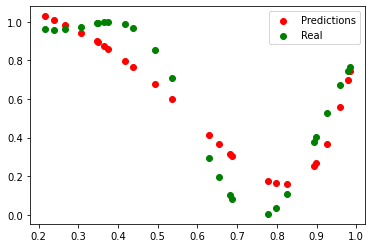

In [33]:
weights = polynomial_regression(fun1, 1)
weights = polynomial_regression(fun2, 3)
weights = polynomial_regression(fun3, 9, learning_rate=0.1, epochs=10000)
weights = polynomial_regression(fun4, 9)